In [31]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing import image

# **CNN Model Evaluations: Charts and Results**

<span style="color:blue">

#### **Left Chart (Training and Validation Accuracy):**

</span>

- The x-axis represents the epochs, showing the progress of training over time from epoch 1 to 10.
- The y-axis represents accuracy, which in this case measures the proportion of correct predictions made by the model.
- The blue line (marked with blue dots) tracks the training accuracy at each epoch.
- The solid blue line tracks the validation accuracy at each epoch. This measures how well the model performs on a separate set of data not seen during training, providing an indication of how well the model generalizes.

<span style="color:red">

#### **Right Chart (Training and Validation Loss):**

</span>
- The x-axis again represents the epochs.
- The y-axis represents loss, which is a measure of the prediction error made by the model. Lower values are better as they indicate a smaller error.
- The red dots represent the training loss at each epoch, showing how the model's error decreases as it learns.
- The solid red line represents the validation loss, which tracks how the prediction error evolves on the validation dataset.

## **CNN Model: Light from Scratch**

In [21]:
# Load the training history from the JSON file
try:
    with open('cnn_model_light.json', 'r') as file:
        history_light = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_light.json'} does not exist.")
    history_light = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [22]:
# Access the history dictionary
acc = history_light['accuracy']
val_acc = history_light['val_accuracy']
loss = history_light['loss']
val_loss = history_light['val_loss']

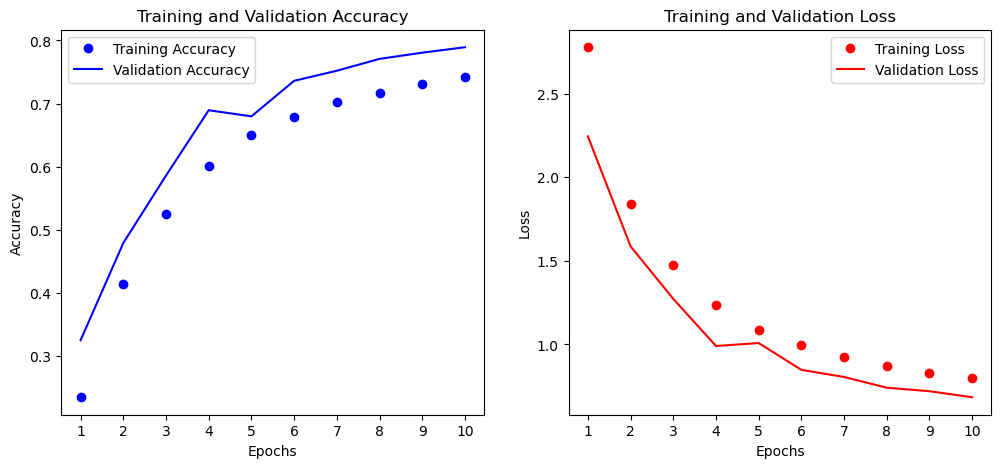

In [23]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [24]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_light['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_light['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_light['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_light['loss'][epoch]}")
    print(f"    Validation Loss: {history_light['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.23484022915363312
    Validation Accuracy: 0.3252461850643158
    Training Loss: 2.7767763137817383
    Validation Loss: 2.2440414428710938
Epoch 2:
    Training Accuracy: 0.4149872958660126
    Validation Accuracy: 0.47919315099716187
    Training Loss: 1.8417434692382812
    Validation Loss: 1.5862687826156616
Epoch 3:
    Training Accuracy: 0.5254289507865906
    Validation Accuracy: 0.5860069990158081
    Training Loss: 1.4731796979904175
    Validation Loss: 1.2721320390701294
Epoch 4:
    Training Accuracy: 0.6004447937011719
    Validation Accuracy: 0.6894853711128235
    Training Loss: 1.2345728874206543
    Validation Loss: 0.9905050992965698
Epoch 5:
    Training Accuracy: 0.649543821811676
    Validation Accuracy: 0.6797966957092285
    Training Loss: 1.0857093334197998
    Validation Loss: 1.0082212686538696
Epoch 6:
    Training Accuracy: 0.6779910922050476
    Validation Accuracy: 0.73606258630

### **CNN Model: Light from Scratch Conclusion**

### **Overview**
The analysis of the training and validation accuracy and loss over 10 epochs provides a comprehensive view of the model's learning behavior. The key observations are:

- **Training Accuracy** increases from **23.48% to 74.17%**.
- **Validation Accuracy** also increases, closely mirroring the training accuracy, from **32.52% to 78.93%**.
- **Training and Validation Loss** both decrease consistently across epochs, which suggests effective learning and generalization.

### **Evaluation Points**

- **Overfitting**:
  - There are no clear signs of overfitting, as both the training and validation metrics improve in tandem. No divergence where training significantly outperforms validation suggests that the model generalizes well to unseen data.

- **Underfitting**:
  - The model does not show signs of underfitting, as evidenced by substantial and steady improvements in accuracy and loss, indicating that the model's capacity is adequate for the complexity of the data.

- **Good Fit**:
  - The parallel improvement in training and validation accuracy and loss, alongside consistent gains across metrics without plateauing, indicates that the model is well-fitted to the data.

### **Conclusion**

The training session results demonstrate a **good fit** for the model on the provided dataset. It effectively learns and generalizes patterns without overfitting or underfitting. 

In [26]:
# Load the model
scratch_model_light = load_model('scratch_model_light.h5')

In [32]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_light, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 5s 5s/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 20ms/step
Prediction for myImages/ok.jpg: call
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


## **CNN Model: Deep from Scratch**

In [17]:
# Load the training history from the JSON file
try:
    with open('cnn_model_deep.json', 'r') as file:
        history_deep = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_deep.json'} does not exist.")
    history_deep = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [18]:
# Access the history dictionary
acc = history_deep['accuracy']
val_acc = history_deep['val_accuracy']
loss = history_deep['loss']
val_loss = history_deep['val_loss']

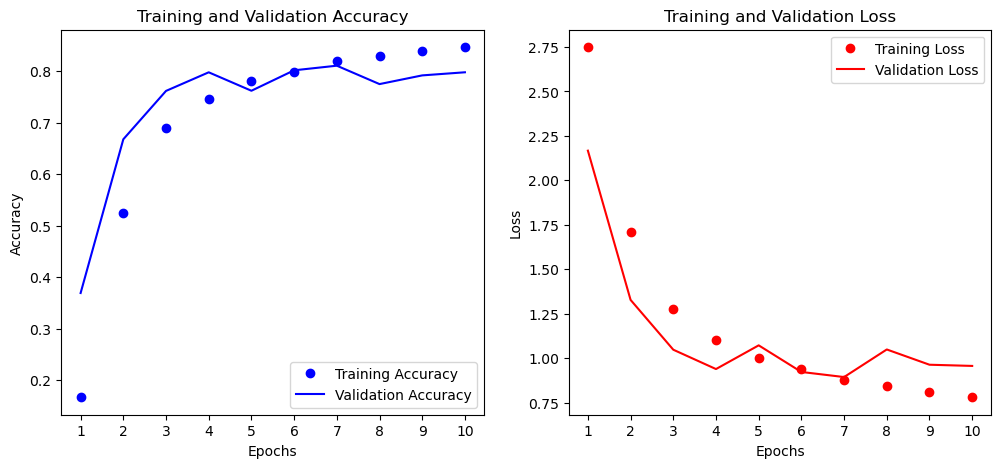

In [19]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [20]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_deep['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_deep['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_deep['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_deep['loss'][epoch]}")
    print(f"    Validation Loss: {history_deep['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.1664397269487381
    Validation Accuracy: 0.36904382705688477
    Training Loss: 2.748460054397583
    Validation Loss: 2.1669039726257324
Epoch 2:
    Training Accuracy: 0.524634599685669
    Validation Accuracy: 0.6679638028144836
    Training Loss: 1.7113209962844849
    Validation Loss: 1.3278752565383911
Epoch 3:
    Training Accuracy: 0.6900190711021423
    Validation Accuracy: 0.7619917392730713
    Training Loss: 1.2756727933883667
    Validation Loss: 1.0478925704956055
Epoch 4:
    Training Accuracy: 0.7466526031494141
    Validation Accuracy: 0.798165500164032
    Training Loss: 1.1041144132614136
    Validation Loss: 0.939116358757019
Epoch 5:
    Training Accuracy: 0.7807166576385498
    Validation Accuracy: 0.7623094320297241
    Training Loss: 1.0004847049713135
    Validation Loss: 1.072414517402649
Epoch 6:
    Training Accuracy: 0.7986338138580322
    Validation Accuracy: 0.8020568490028381

### **CNN Model: Deep from Scratch Conclusion**

### **Overview**
The detailed review of the model's training and validation accuracy and loss over 10 epochs reveals significant information about its performance and generalization capabilities. The observed metrics show:

- **Training Accuracy:** consistently increases from **16.64% to 84.69%**.
- **Validation Accuracy:** also improves, though with some fluctuations, peaking at **80.21% in Epoch 6** and closing at **79.82% in Epoch 10**.
- **Training Loss:** decreases from **2.75 to 0.78**, showing progressive learning.
- **Validation Loss:** decreases overall but exhibits fluctuations, indicating some variability in how the model generalizes to unseen data.

### Key Points

- **Overfitting Signs:**
  - There are potential signs of overfitting as observed from fluctuations in the validation accuracy and loss, especially when validation loss increases in later epochs (Epoch 8) while training loss continues to decrease. This divergence might suggest that the model is beginning to memorize training data.

- **Underfitting Signs:**
  - Initial epochs show substantial gaps between training and validation metrics, suggesting initial underfitting. However, as training progresses, the model begins to fit the training data more accurately, and this gap narrows, indicating reduced underfitting.

- **Good Fit Indicators:**
  - The consistent improvement in training accuracy and the corresponding decrease in training loss throughout the epochs indicate that the model is effectively learning the training data. The validation metrics, despite their fluctuations, follow a generally improving trend, suggesting that with some adjustments, the model could potentially generalize even better.

### **Conclusion**

The analysis suggests that while the model is learning and improving based on training data (good fit), there are signs of potential overfitting, indicated by the increase in validation loss towards later epochs. To improve the model's generalization and curb overfitting:
- **Implement regularization techniques** such as dropout or L2 regularization.
- **Adjust the model's architecture or training parameters**, potentially reducing the model's complexity or altering the learning rate.
- **Enhance training with more varied data** or augment the existing dataset to better train the model for general scenarios.

These tweaks will be added in the next CNN Models along with Data Augmentation and hopefully improvements will be seen.

In [34]:
# Load the model
scratch_model_deep = load_model('scratch_model_deep.h5')

In [35]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_deep, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 0s 360ms/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/ok.jpg: ok
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


## **CNN Model: Data Augmentation**

## **CNN Model: Data Augmentation Fine Tuned**

## **CNN Model: Grayscale**